# Temporal Networks v2.0 #

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
import RandTempNet.utils as tnu
import RandTempNet.measures as tnm
import RandTempNet.randomisations as tnr

## Link shuffling ##
We here present randomization techniques based which shuffle links in the static network. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Link permutation $\text{P}[p_\mathcal{L}(\Theta)]$: `P__pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`.

In [7]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__pTheta(lks_data)

Test of the mean degree preservation:

In [8]:
deg0 = tnm.degrees(lks_data.links())
deg1 = tnm.degrees(new_lks.links())
sum(deg0.values()) == sum(deg1.values())

True

Test of the link permutation:

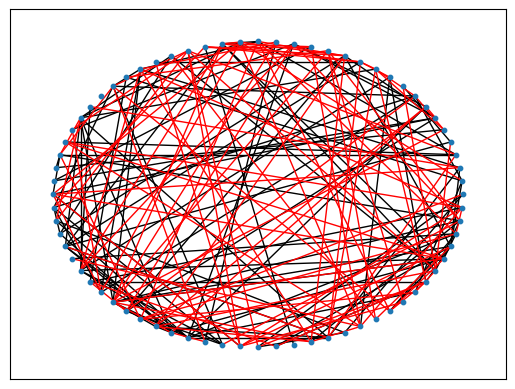

In [9]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation with degree preservation $\text{P}[\mathbf{k},p_\mathcal{L}(\Theta)]$: `P__k_pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, while preserving the degrees of the nodes.

In [12]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__k_pTheta(lks_data)

Test of the degree preservation:

In [13]:
deg0 = tnm.degrees(lks_data.links())
deg1 = tnm.degrees(new_lks.links())
Test = np.array([deg0[n] == deg1[n] for n in deg0])
Test.all()

True

Test of the link permutation:

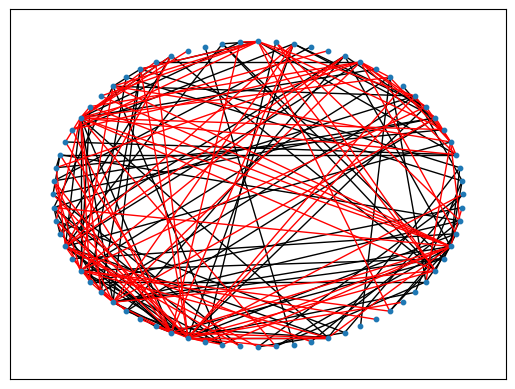

In [14]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation with degree preservation $\text{P}[\mathbf{k},\mathbb{I}_\lambda,p_\mathcal{L}(\Theta)]$: `P__k_I_pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data` while prserving the degrees of the nodes and ensuring that the aggregated randomised network is simply connected. It relies on the `is_connected()` function from `networkx`.

In [15]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__k_I_pTheta(lks_data)

The part about shuffling with group preservation has not been tested since the metadata about the groups is not present in the original repository. Still the related function have all been traslated in Python 3.